# CDS6214 Data Science Fundamentals Project (40%)

### Group Number: G05
### Title: Diabetes Dataset Analysis

Team Members and Contribution :
| ID         | Name                                    | Contribution (in %) |
|------------|-----------------------------------------|----------------------|
| 1191103320 | AHMAD ZUBIR BIN ZAINUDIN                | 25%                  |
| 1221302587 | NUR FATIN NABILAH BINTI MD. IRZAN       | 25%                  |
|            | NUR AINAHUSNA BINTI MOHD NASIR          | 25%                  |
|            | ANIS NUR HANANI BINTI AZHAR             | 25%                  |
| **Total**  |                                         | **100%**             |

# Diabetes Dataset Analysis

This notebook provides a comprehensive analysis of the Pima Indians Diabetes Dataset, aiming to predict diabetes onset. It involves data loading, preprocessing, exploratory data analysis (EDA), feature selection, model building, and evaluation. Below are the details of each section.

### Data Loading and Preprocessing

Loading the Dataset:

- The dataset used in this analysis is the Pima Indians Diabetes Dataset. 
It contains information on 768 women of Pima Indian heritage, who were tested for diabetes based on various diagnostic measures. 
The dataset was originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases and is available in the UCI Machine Learning Repository.

In [93]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, f1_score, roc_curve, roc_auc_score,
                             precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import skew, zscore

# Load dataset
url = 'https://raw.githubusercontent.com/Zue77/Pima-Indians-Diabetes-Dataset/main/diabetes.csv'
data = pd.read_csv(url)

# Display the total number of rows and columns
total_rows, total_columns = data.shape
print(f"Total number of rows (data points): {total_rows}")

# outcome (-1) is not a feature
print(f"Total number of columns (features): {total_columns - 1}")

# Display first few rows of the dataset
data.head()

Total number of rows (data points): 768
Total number of columns (features): 8


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Feature Selection

The dataset contains the following features:

- Pregnancies: Number of times pregnant

- Glucose: Plasma glucose concentration (2 hours in an oral glucose tolerance test)

- BloodPressure: Diastolic blood pressure (mm Hg)

- SkinThickness: Triceps skinfold thickness (mm)

- Insulin: 2-Hour serum insulin (mu U/ml)

- BMI: Body mass index (weight in kg/(height in m)^2)

- DiabetesPedigreeFunction: A function that represents the likelihood of diabetes based on family history

- Age: Age of the patient (years)

- Outcome: Class variable (0 or 1) indicating whether the patient has diabetes

In [94]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
            'DiabetesPedigreeFunction', 'Age']

Data Preprocessing:

- Zero Value Handling: Removed entries with zero values in critical features like Glucose, BloodPressure, Insulin, and BMI, as these are likely placeholders for missing data.

- Missing Values: Confirmed that there are no missing values in the filtered dataset.

- Outlier Removal: Used the Z-score method to identify and remove outliers from the dataset.

- Feature Scaling: Applied StandardScaler to normalize the features, transforming them to have a mean of 0 and a standard deviation of 1.

In [95]:
# Data Preprocessing
# Remove rows with zeros in critical columns
data_filtered = data[(data['Glucose'] != 0) & (data['BloodPressure'] != 0) &
                     (data['Insulin'] != 0) & (data['BMI'] != 0)]
print(f"\nNumber of entries after filtering: {data_filtered.shape[0]}")

# Print the number of people with and without diabetes
diabetes_counts = data_filtered['Outcome'].value_counts()
print(f"\nNumber of people with diabetes: {diabetes_counts.get(1, 0)}")
print(f"Number of people without diabetes: {diabetes_counts.get(0, 0)}")

# Handle Missing Values (if any)
# Check for missing values
missing_values = data_filtered.isnull().sum()
print(f"\nMissing values in each column:\n{missing_values}")

# Outlier Detection and Removal
# Z-score method for outlier detection
z_scores = np.abs(zscore(data_filtered[features]))
outliers = (z_scores > 3).any(axis=1)
data_filtered_no_outliers = data_filtered[~outliers]
print(f"\nNumber of entries after outlier removal: {data_filtered_no_outliers.shape[0]}")

# Feature Scaling
scaler = StandardScaler()
X = data_filtered_no_outliers.drop('Outcome', axis=1)
y = data_filtered_no_outliers['Outcome']
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame for consistency
data_scaled = pd.DataFrame(X_scaled, columns=X.columns)
data_scaled['Outcome'] = y.values


Number of entries after filtering: 392

Number of people with diabetes: 130
Number of people without diabetes: 262

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Number of entries after outlier removal: 365


### Statistics

- The print_statistics function calculates and prints the average, minimum, and maximum values for each features.

In [96]:
def print_statistics(column, data):
    avg = data[column].mean()
    min_val = data[column].min()
    max_val = data[column].max()
    print(f"\nStatistics for {column}:")
    print(f"Average {column}: {avg:.2f}")
    print(f"Min {column}: {min_val:.2f}, Max {column}: {max_val:.2f}")

for feature in features:
    print_statistics(feature, data_filtered)


Statistics for Pregnancies:
Average Pregnancies: 3.30
Min Pregnancies: 0.00, Max Pregnancies: 17.00

Statistics for Glucose:
Average Glucose: 122.63
Min Glucose: 56.00, Max Glucose: 198.00

Statistics for BloodPressure:
Average BloodPressure: 70.66
Min BloodPressure: 24.00, Max BloodPressure: 110.00

Statistics for SkinThickness:
Average SkinThickness: 29.15
Min SkinThickness: 7.00, Max SkinThickness: 63.00

Statistics for Insulin:
Average Insulin: 156.06
Min Insulin: 14.00, Max Insulin: 846.00

Statistics for BMI:
Average BMI: 33.09
Min BMI: 18.20, Max BMI: 67.10

Statistics for DiabetesPedigreeFunction:
Average DiabetesPedigreeFunction: 0.52
Min DiabetesPedigreeFunction: 0.09, Max DiabetesPedigreeFunction: 2.42

Statistics for Age:
Average Age: 30.86
Min Age: 21.00, Max Age: 81.00


Skewness Analysis

- Calculate the skewness of the statistics.

In [97]:
def print_skewness(column, data):
    skewness = skew(data[column])
    print(f"\nSkewness of {column}: {skewness:.2f}")

for feature in features:
    print_skewness(feature, data_filtered)


Skewness of Pregnancies: 1.33

Skewness of Glucose: 0.52

Skewness of BloodPressure: -0.09

Skewness of SkinThickness: 0.21

Skewness of Insulin: 2.16

Skewness of BMI: 0.66

Skewness of DiabetesPedigreeFunction: 1.95

Skewness of Age: 1.40


### Exploratory Data Analysis (EDA)

Histograms:

- We visualize the distribution of each feature using histograms.


<Figure size 1500x1000 with 0 Axes>

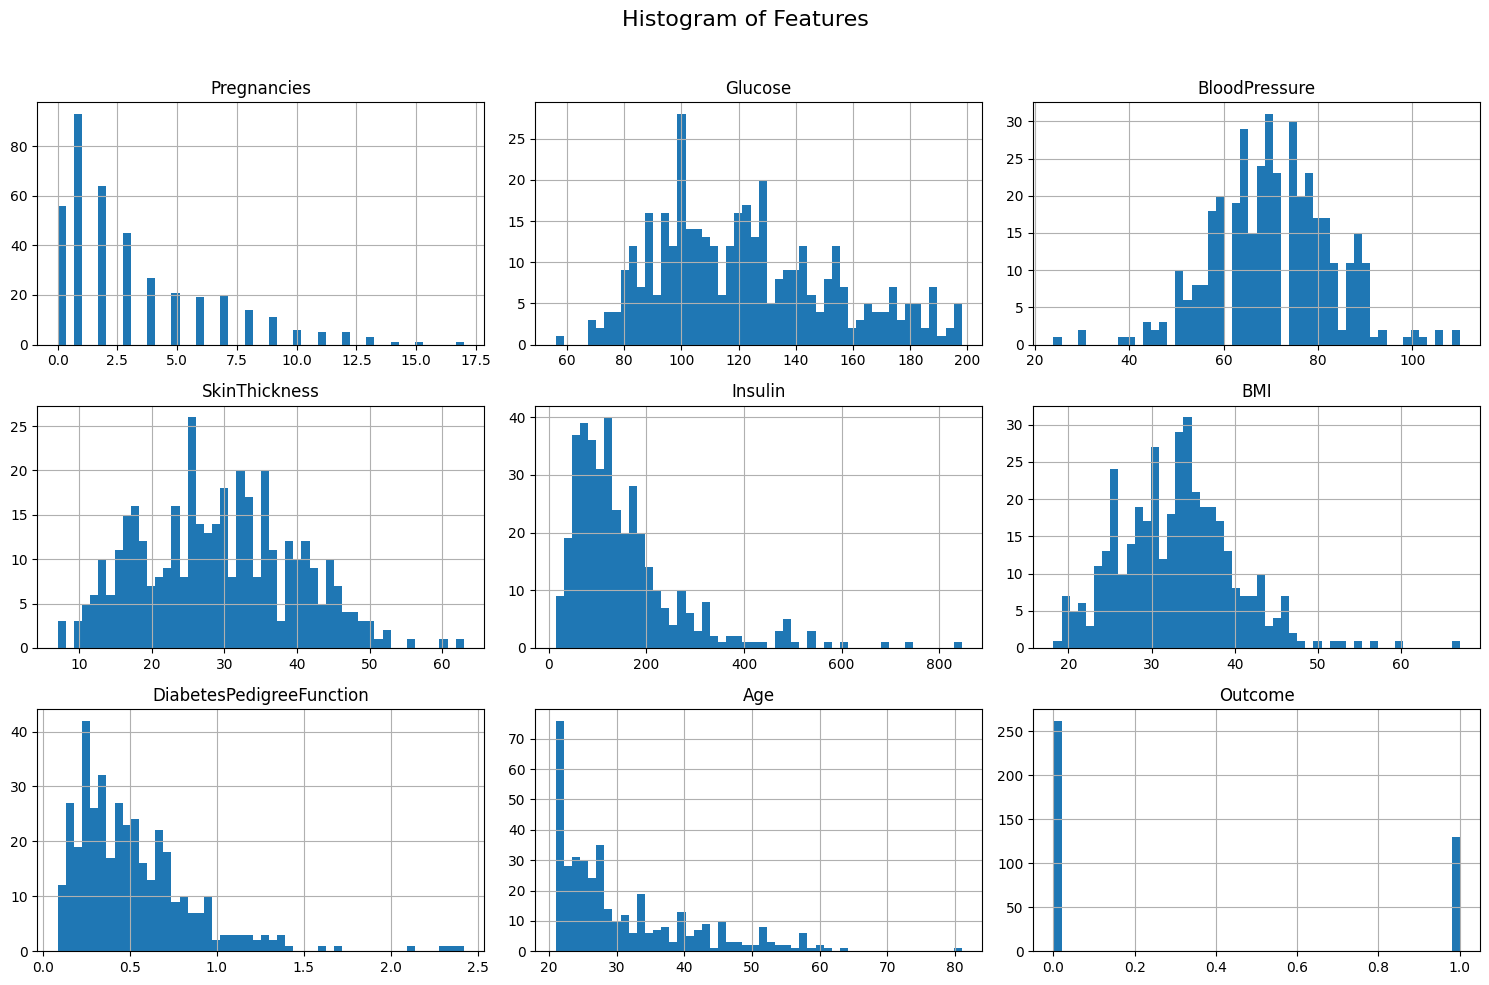

In [98]:
# Histogram of Features
def plot_histograms(data, features):
    plt.figure(figsize=(15, 10))
    data_filtered.hist(bins=50, figsize=(15, 10))
    plt.suptitle('Histogram of Features', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_histograms(data_filtered, features)

Density Plots:

- We use density plots to visualize the distribution of each feature.

<Figure size 1500x1000 with 0 Axes>

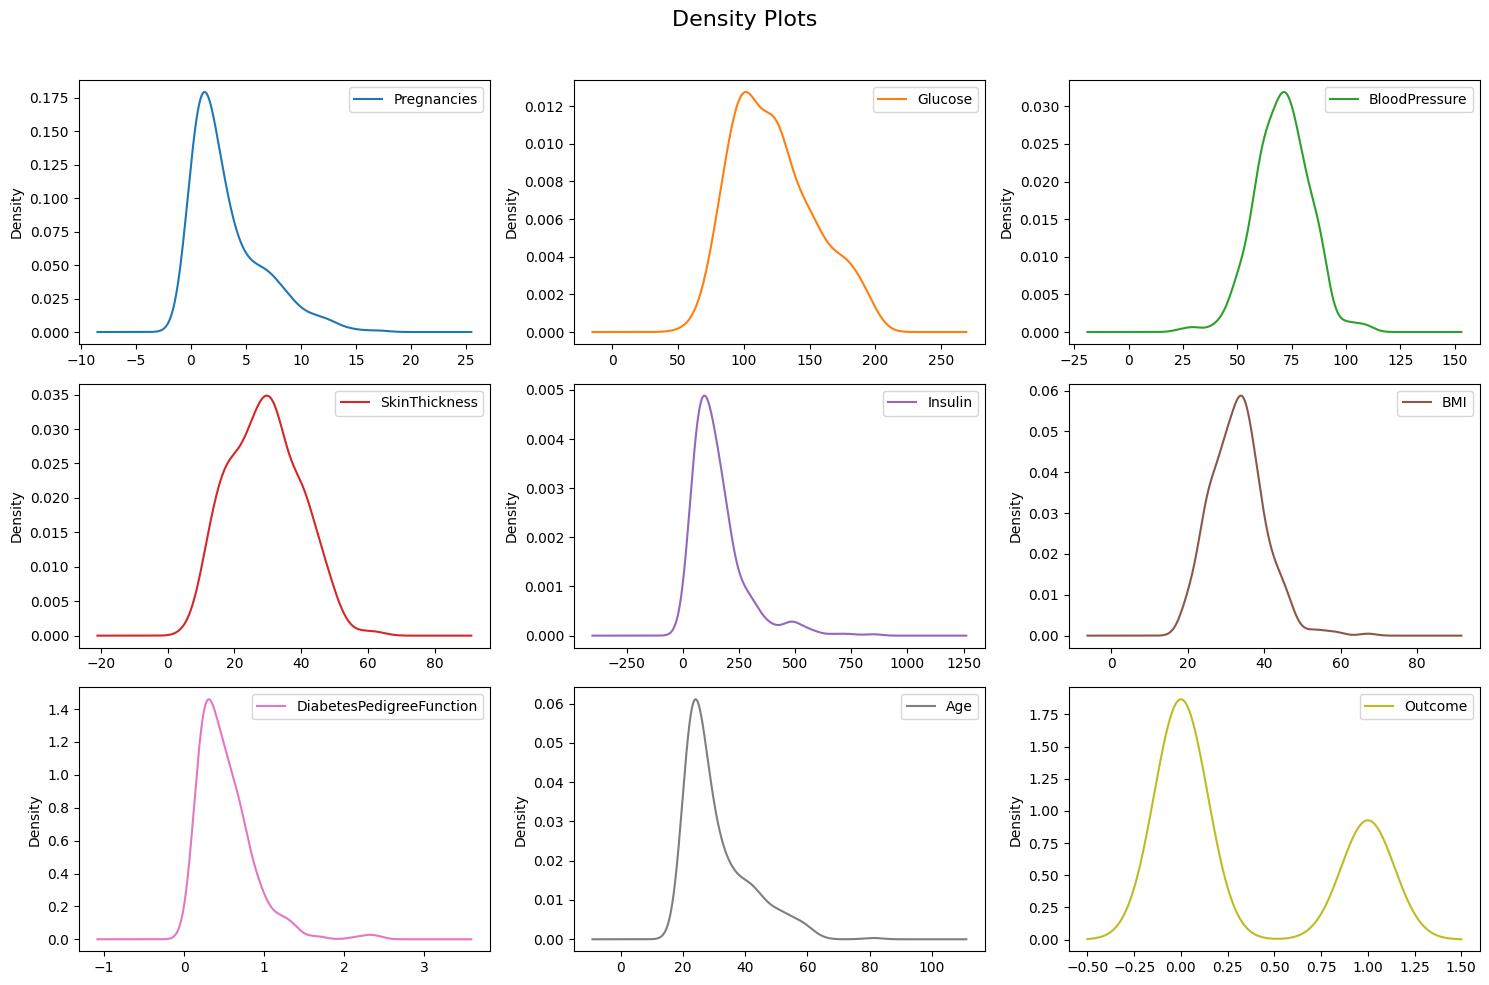

In [99]:
# Density Plots
def plot_density(data, features):
    plt.figure(figsize=(15, 10))
    data_filtered.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(15, 10))
    plt.suptitle('Density Plots', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_density(data_filtered, features)

Box Plots:

- Box plots help us visualize the distribution and detect outliers in the data.

<Figure size 1500x1000 with 0 Axes>

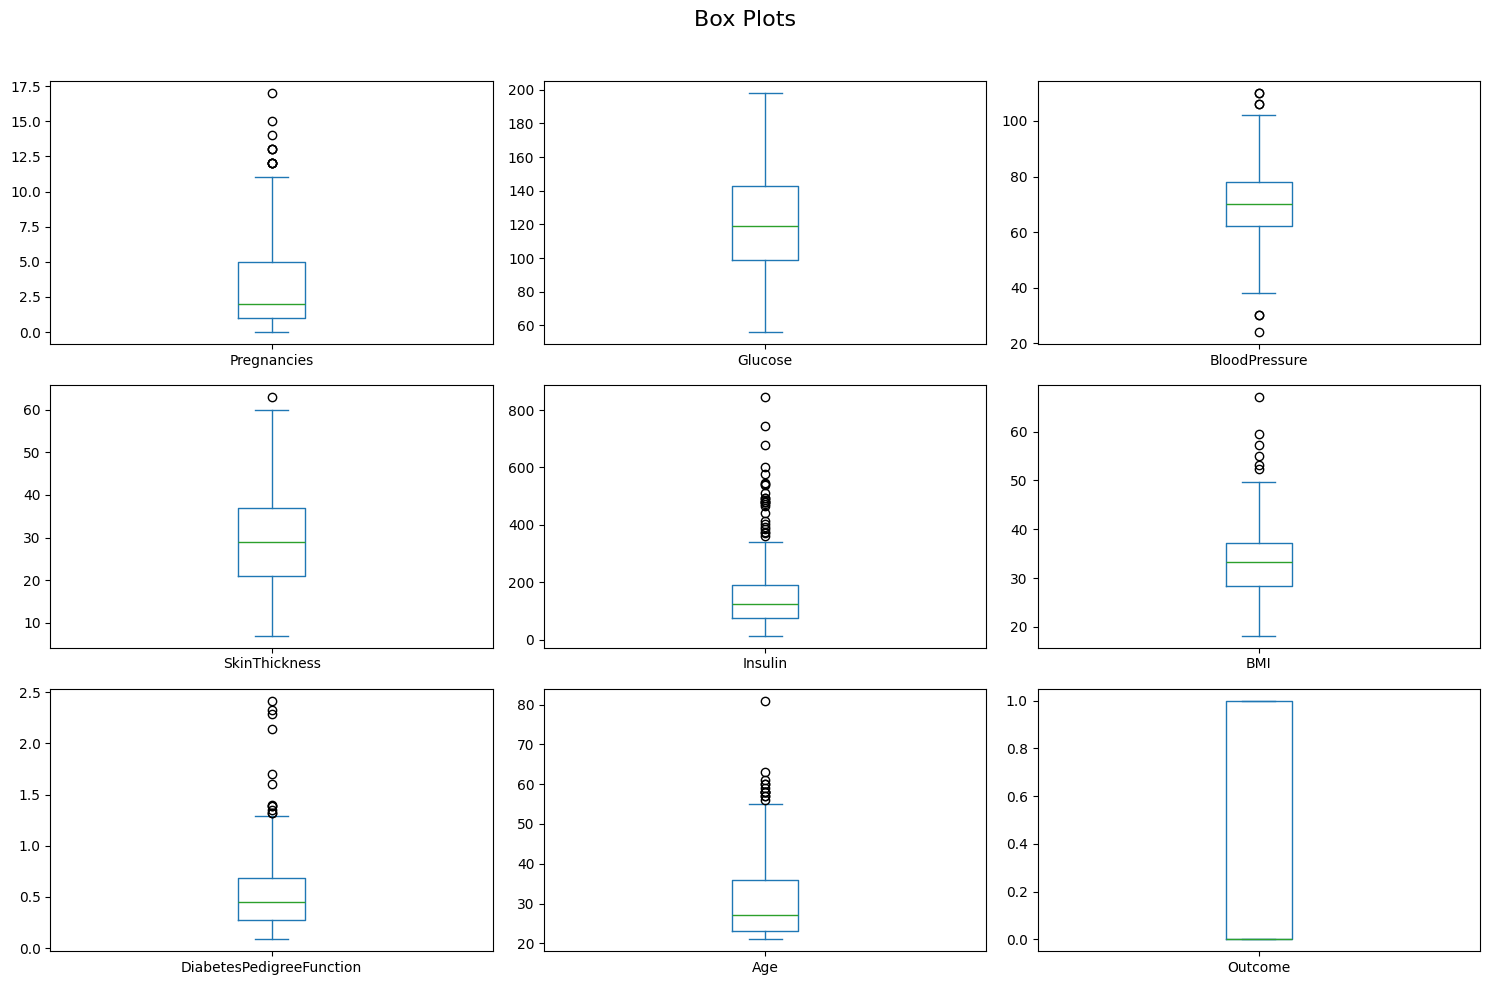

In [100]:
# Box Plots
def plot_boxplots(data, features):
    plt.figure(figsize=(15, 10))
    data_filtered.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(15, 10))
    plt.suptitle('Box Plots', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_boxplots(data_filtered, features)

Correlation Matrix:

- A heatmap of the correlation matrix shows the relationships between features.

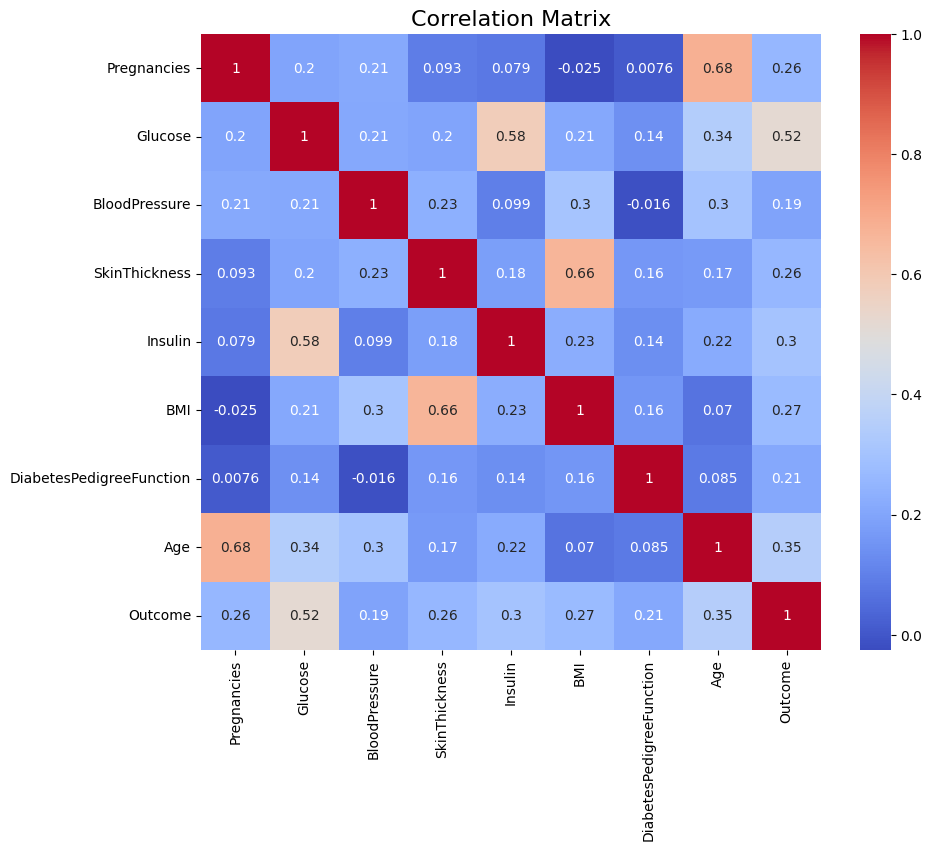

In [101]:
# Correlation Matrix
def plot_correlation_matrix(data):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

plot_correlation_matrix(data_filtered)

Pair Plot:

- We visualize pairwise relationships and distributions between features, colored by the outcome.

<Figure size 1200x1000 with 0 Axes>

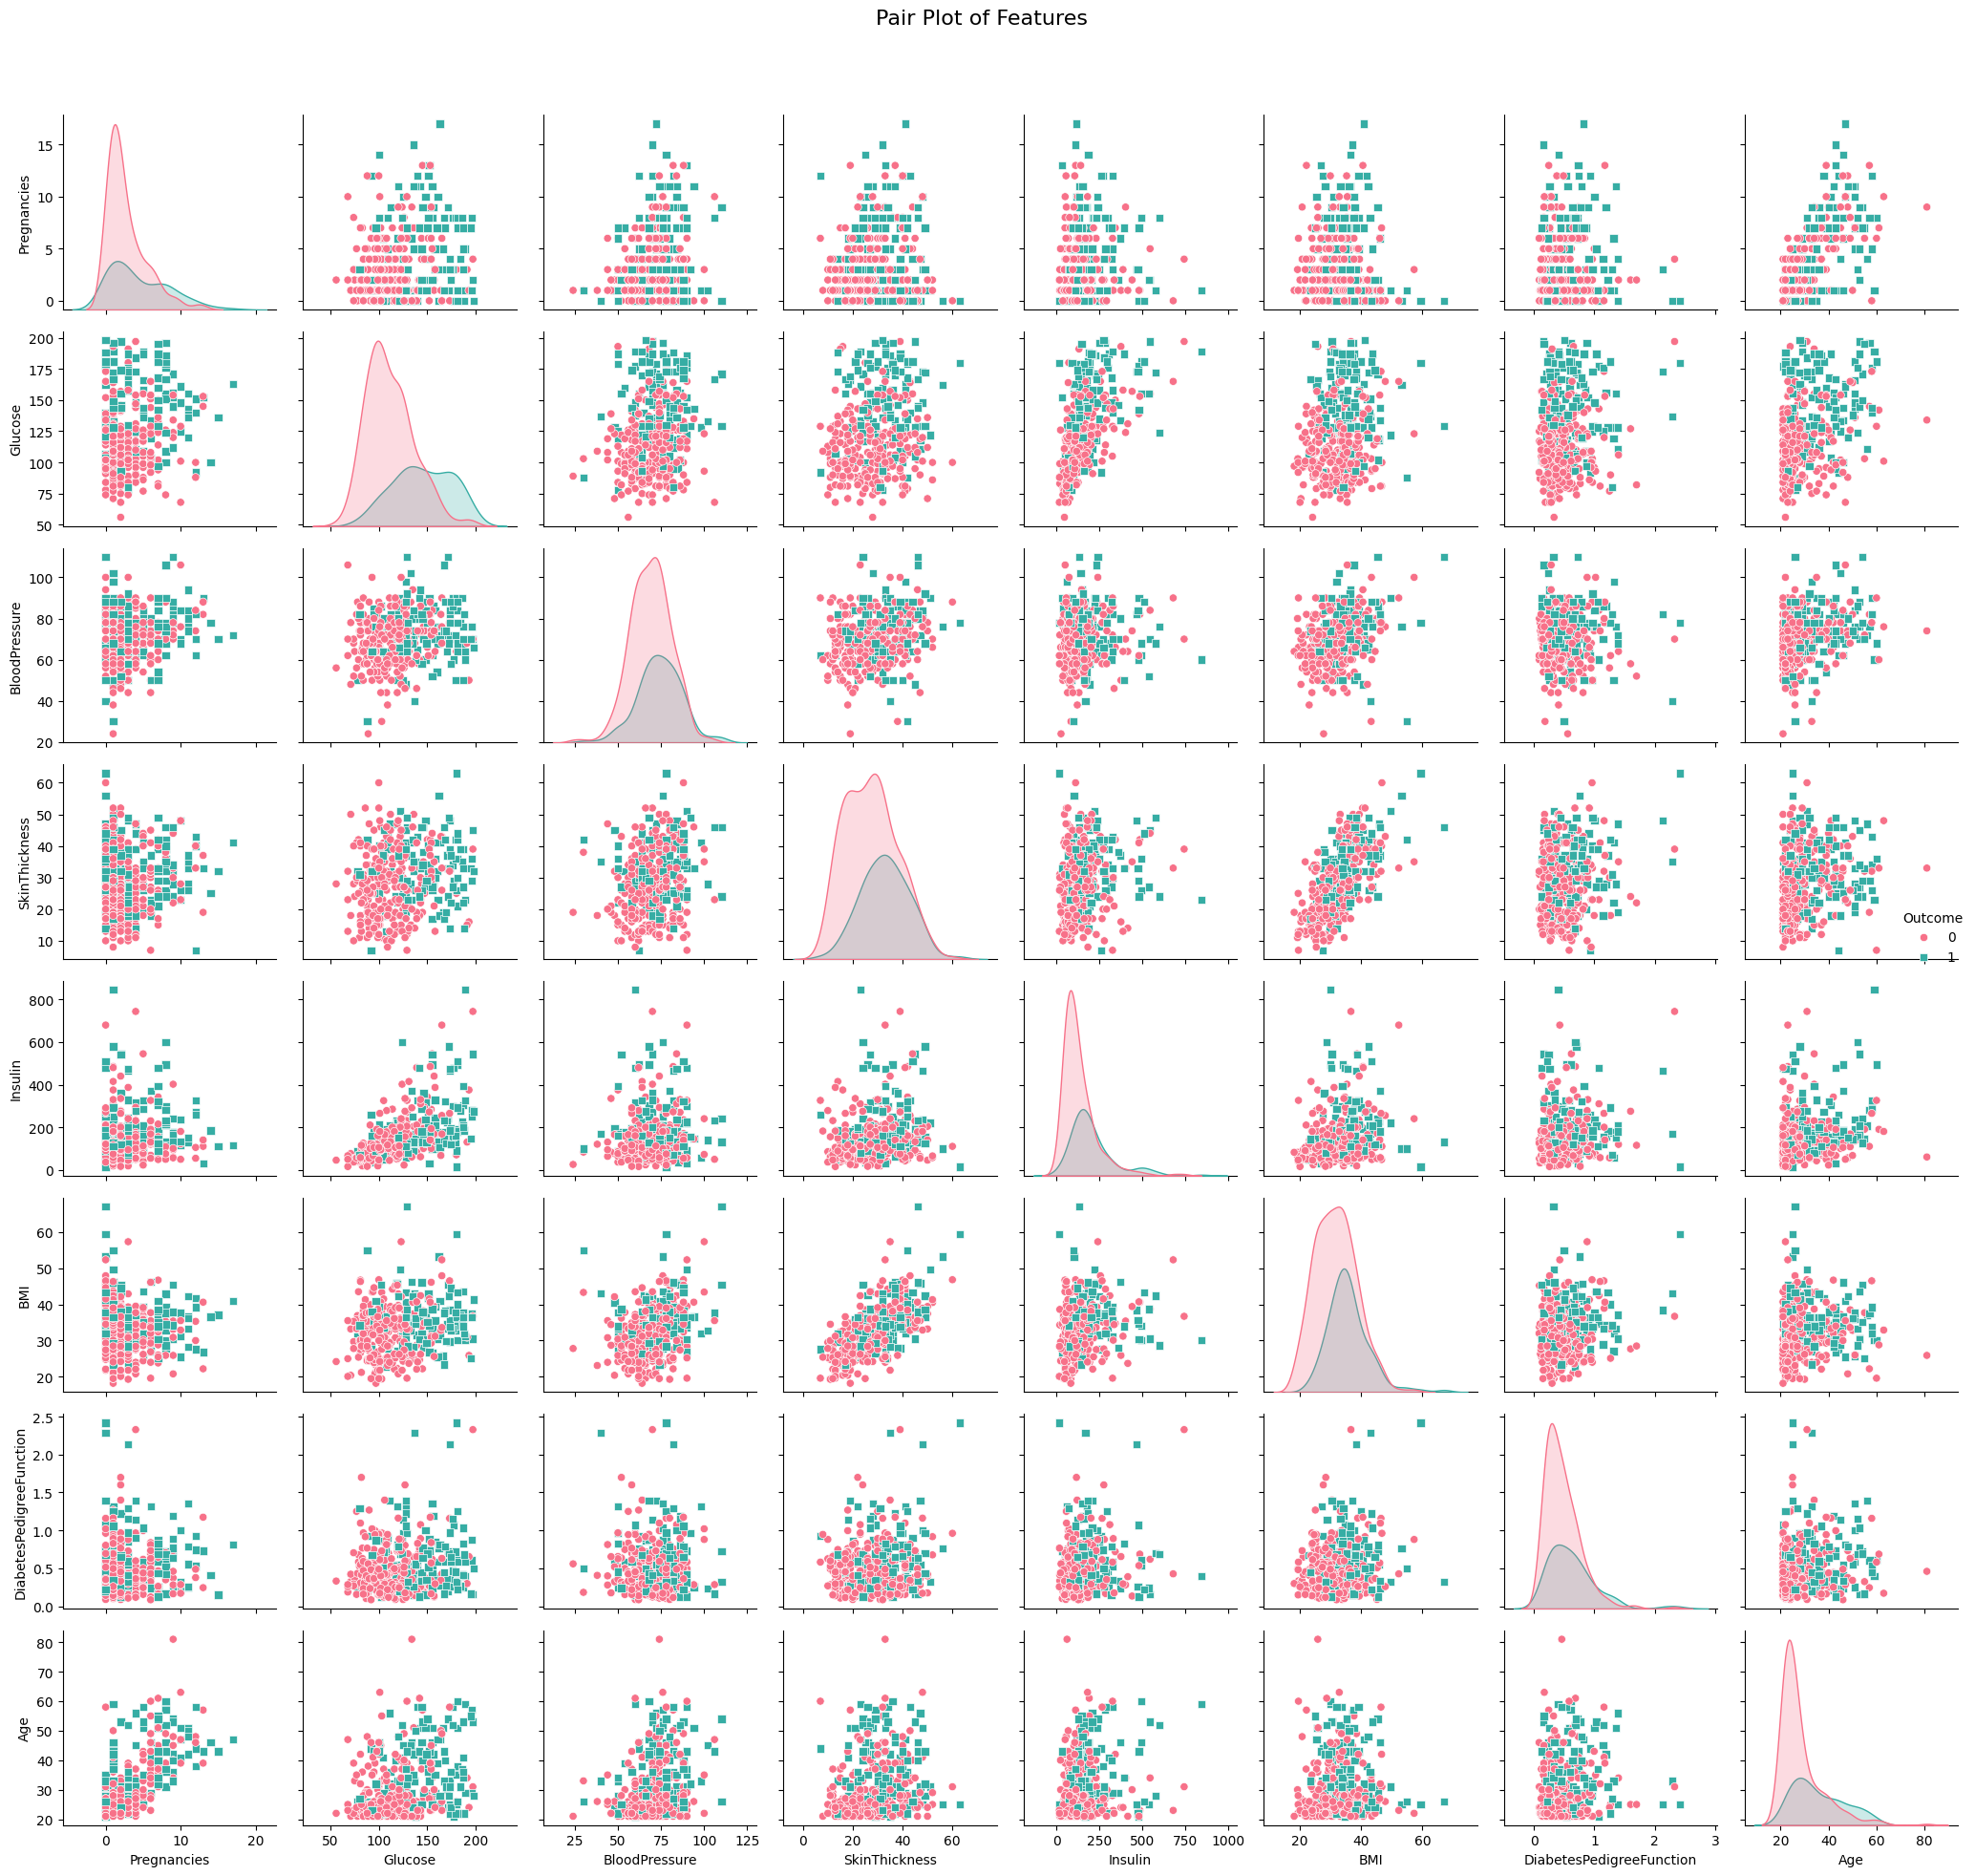

In [102]:
# Pair Plot
def plot_pair_plot(data, hue):
    plt.figure(figsize=(12, 10))
    sns.pairplot(data_filtered, hue='Outcome', markers=['o', 's'], palette='husl')
    plt.suptitle('Pair Plot of Features', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_pair_plot(data_filtered, hue='Outcome')

### Prepare Data for Modeling

Split the data into training and testing sets and scale the features.

In [103]:
X = data_filtered[features]
y = data_filtered['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training and Evaluation
Logistic Regression with statsmodels
- Fit a logistic regression model using the statsmodels library and display a summary of the results.

In [132]:
X_stats = sm.add_constant(X_train)  # Add constant for statsmodels
logit_model_stats = sm.Logit(y_train, X_stats)
result_stats = logit_model_stats.fit()

print("Logistic Regression Summary with statsmodels:")
print(result_stats.summary())

Optimization terminated successfully.
         Current function value: 0.410689
         Iterations 7
Logistic Regression Summary with statsmodels:
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  262
Model:                          Logit   Df Residuals:                      253
Method:                           MLE   Df Model:                            8
Date:                Thu, 05 Sep 2024   Pseudo R-squ.:                  0.3591
Time:                        11:41:45   Log-Likelihood:                -107.60
converged:                       True   LL-Null:                       -167.90
Covariance Type:            nonrobust   LLR p-value:                 2.498e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0147      0.184     -5.524      0.000      -1

Basic Logistic Regression
- Train a logistic regression model and evaluate its performance.

In [105]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
y_pred_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

Basic K-Nearest Neighbors (with fixed k=5)
- Train a K-Nearest Neighbors model and evaluate its performance.

In [106]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

Hyperparameter Tuning for Logistic Regression
- Use Grid Search to find the best hyperparameters for the logistic regression model 

In [107]:
logreg_tuned_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
logreg_tuned = GridSearchCV(LogisticRegression(max_iter=1000, solver='liblinear'), logreg_tuned_params, cv=5)
logreg_tuned.fit(X_train, y_train)

logreg_best = logreg_tuned.best_estimator_
y_pred_logreg_tuned = logreg_best.predict(X_test)
y_pred_prob_logreg_tuned = logreg_best.predict_proba(X_test)[:, 1]

Hyperparameter Tuning for K-Nearest Neighbors
- Use Grid Search to find the best hyperparameters for the K-Nearest Neighbors model


In [108]:
knn_tuned_params = {'n_neighbors': [3, 5, 7, 10, 15], 'weights': ['uniform', 'distance']}
knn_tuned = GridSearchCV(KNeighborsClassifier(), knn_tuned_params, cv=5)
knn_tuned.fit(X_train, y_train)

knn_best = knn_tuned.best_estimator_
y_pred_knn_tuned = knn_best.predict(X_test)
y_pred_prob_knn_tuned = knn_best.predict_proba(X_test)[:, 1]

Plot KNN Optimal Value

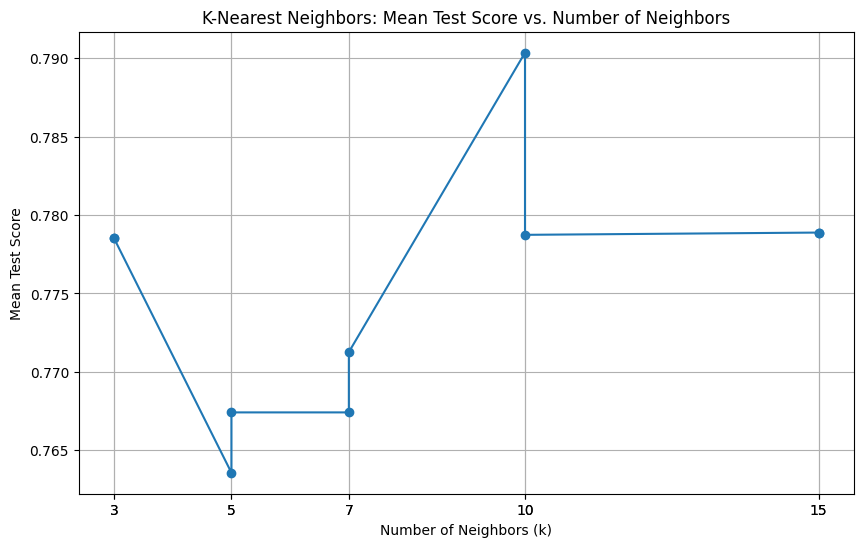

In [109]:
k_values = knn_tuned.cv_results_['param_n_neighbors'].data
mean_test_scores = knn_tuned.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score')
plt.title('K-Nearest Neighbors: Mean Test Score vs. Number of Neighbors')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Model Performance Summary
- Generate classification reports and calculate metrics such as accuracy, precision, recall, f1-score, and ROC AUC

In [110]:
results = {
    'Model': ['Basic Logistic Regression', 'Basic K-Nearest Neighbors', 'Tuned Logistic Regression', 'Tuned K-Nearest Neighbors'],
    'Accuracy': [round(accuracy_score(y_test, y_pred_logreg), 4),
                 round(accuracy_score(y_test, y_pred_knn), 4),
                 round(accuracy_score(y_test, y_pred_logreg_tuned), 4),
                 round(accuracy_score(y_test, y_pred_knn_tuned), 4)],
    'F1 Score': [round(f1_score(y_test, y_pred_logreg), 4),
                 round(f1_score(y_test, y_pred_knn), 4),
                 round(f1_score(y_test, y_pred_logreg_tuned), 4),
                 round(f1_score(y_test, y_pred_knn_tuned), 4)],
    'ROC AUC': [round(roc_auc_score(y_test, y_pred_prob_logreg), 4),
                round(roc_auc_score(y_test, y_pred_prob_knn), 4),
                round(roc_auc_score(y_test, y_pred_prob_logreg_tuned), 4),
                round(roc_auc_score(y_test, y_pred_prob_knn_tuned), 4)]
}

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,F1 Score,ROC AUC
0,Basic Logistic Regression,0.7462,0.5600,0.8197
1,Basic K-Nearest Neighbors,0.7385,0.5854,0.7731
2,Tuned Logistic Regression,0.7385,0.5526,0.8087
3,Tuned K-Nearest Neighbors,0.7385,0.5405,0.7647


#### ROC and Precision-Recall Curves
- Plot ROC curves for both models to compare their performance.

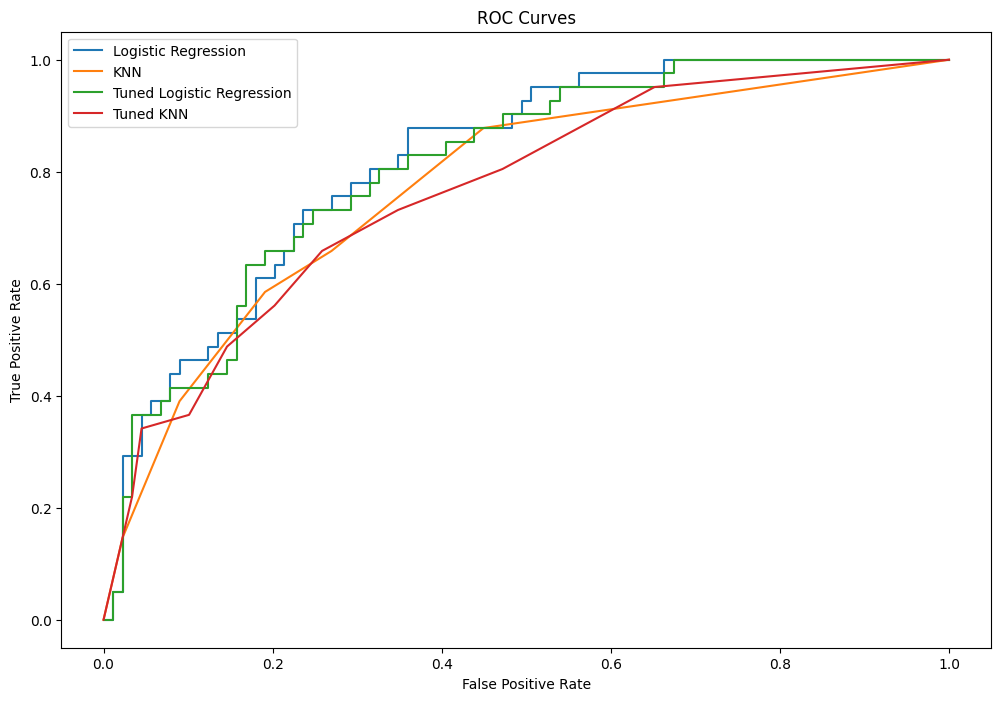

In [111]:
def plot_roc_curves(fprs, tprs, labels):
    plt.figure(figsize=(12, 8))
    for i, (fpr, tpr, label) in enumerate(zip(fprs, tprs, labels)):
        plt.plot(fpr, tpr, label=label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='best')
    plt.show()

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
fpr_logreg_tuned, tpr_logreg_tuned, _ = roc_curve(y_test, y_pred_prob_logreg_tuned)
fpr_knn_tuned, tpr_knn_tuned, _ = roc_curve(y_test, y_pred_prob_knn_tuned)

plot_roc_curves([fpr_logreg, fpr_knn, fpr_logreg_tuned, fpr_knn_tuned],
                [tpr_logreg, tpr_knn, tpr_logreg_tuned, tpr_knn_tuned],
                ['Logistic Regression', 'KNN', 'Tuned Logistic Regression', 'Tuned KNN'])

#### Precision-Recall Curves
- Plot precision-recall curves for both models.

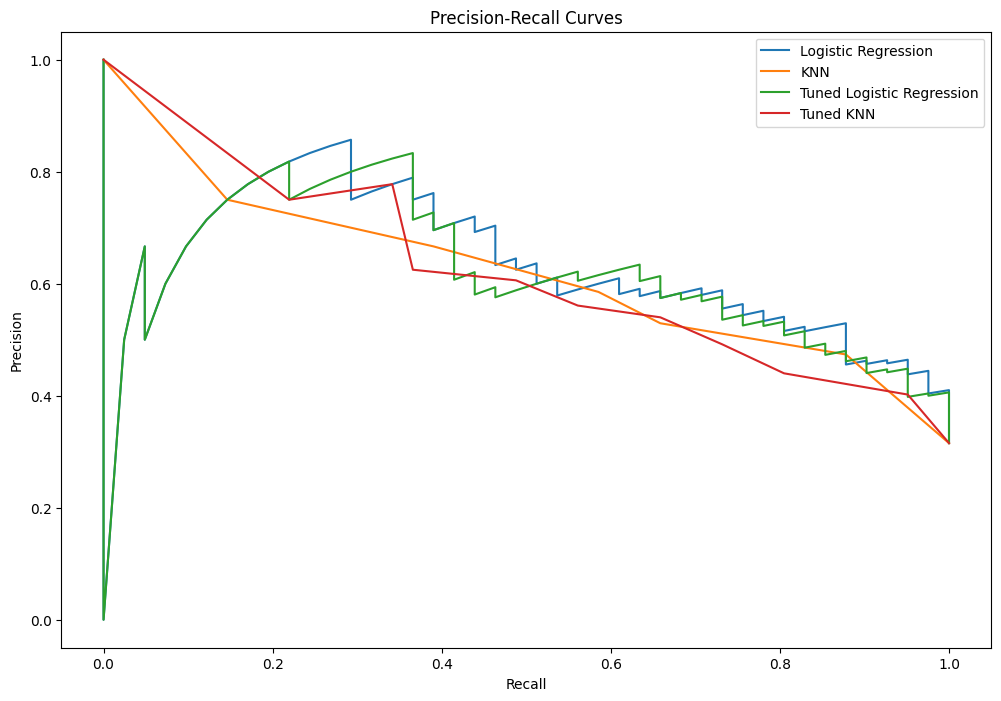

In [112]:
def plot_precision_recall_curves(precisions, recalls, labels):
    plt.figure(figsize=(12, 8))
    for i, (precision, recall, label) in enumerate(zip(precisions, recalls, labels)):
        plt.plot(recall, precision, label=label)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend(loc='best')
    plt.show()

precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_pred_prob_logreg)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_prob_knn)
precision_logreg_tuned, recall_logreg_tuned, _ = precision_recall_curve(y_test, y_pred_prob_logreg_tuned)
precision_knn_tuned, recall_knn_tuned, _ = precision_recall_curve(y_test, y_pred_prob_knn_tuned)

plot_precision_recall_curves([precision_logreg, precision_knn, precision_logreg_tuned, precision_knn_tuned],
                             [recall_logreg, recall_knn, recall_logreg_tuned, recall_knn_tuned],
                             ['Logistic Regression', 'KNN', 'Tuned Logistic Regression', 'Tuned KNN'])

#### Confusion Matrices
- Display confusion matrices for all models.

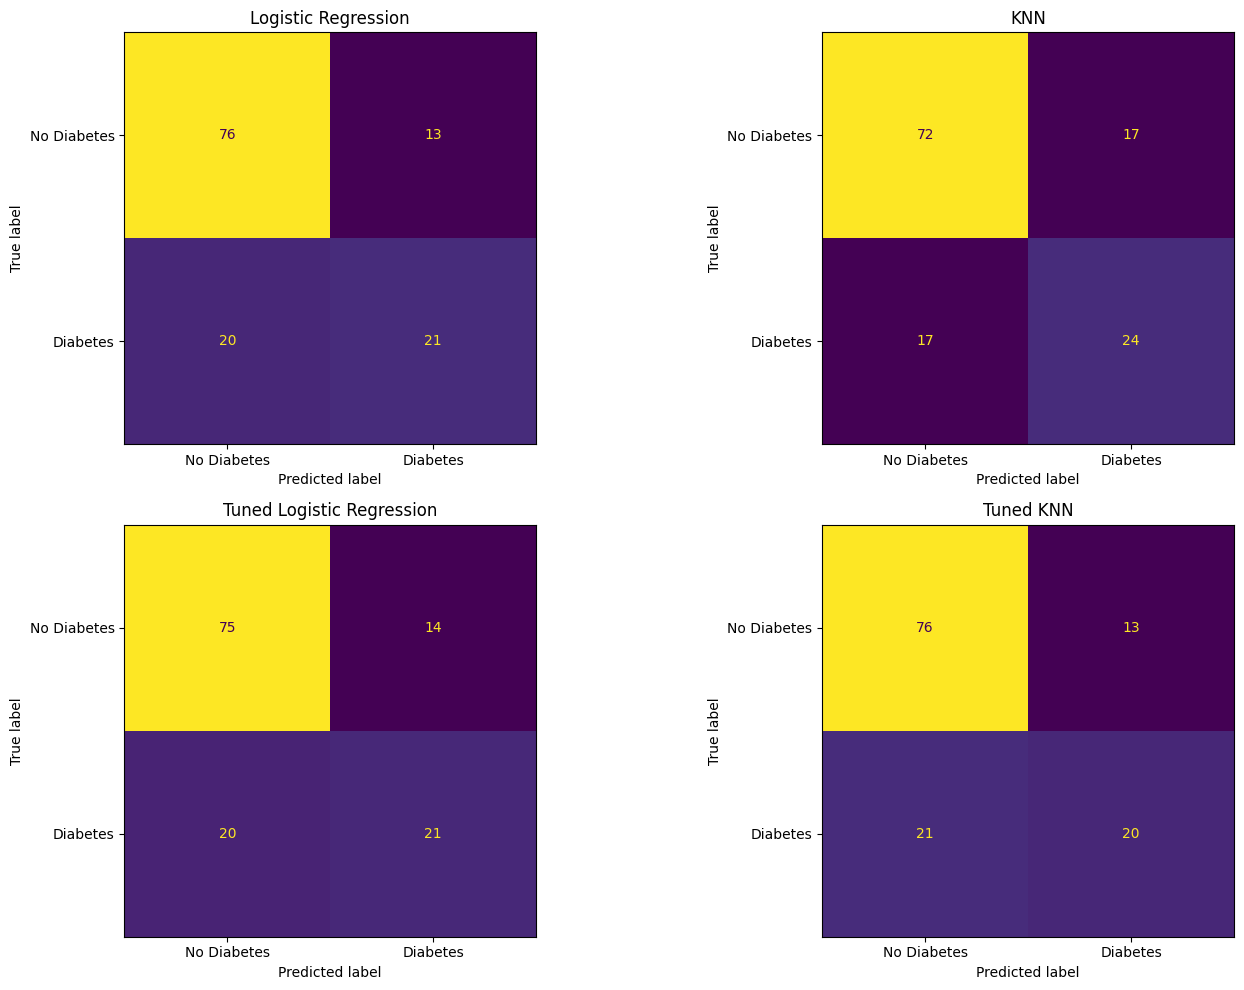

Confusion Matrix for Logistic Regression:
[[76 13]
 [20 21]]

Confusion Matrix for KNN:
[[72 17]
 [17 24]]

Confusion Matrix for Tuned Logistic Regression:
[[75 14]
 [20 21]]

Confusion Matrix for Tuned KNN:
[[76 13]
 [21 20]]



In [133]:
def plot_confusion_matrices(y_true, y_preds, labels):
    plt.figure(figsize=(15, 10))
    for i, (y_pred, label) in enumerate(zip(y_preds, labels)):
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
        plt.subplot(2, 2, i+1)
        disp.plot(ax=plt.gca(), colorbar=False)
        plt.title(label)
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(y_test, [y_pred_logreg, y_pred_knn, y_pred_logreg_tuned, y_pred_knn_tuned],
                        ['Logistic Regression', 'KNN', 'Tuned Logistic Regression', 'Tuned KNN'])





#### Cross-Validation

The cross-validation scores provide an average performance metric, helping us understand how well the models are likely to perform on unseen data.

In [114]:
# Cross-Validation for Tuned Models
cv_scores_logreg_tuned = cross_val_score(logreg_best, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores for Tuned Logistic Regression: {cv_scores_logreg_tuned}")
print(f"Mean Cross-Validation Accuracy for Tuned Logistic Regression: {cv_scores_logreg_tuned.mean():.4f}")

cv_scores_knn_tuned = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores for Tuned K-Nearest Neighbors: {cv_scores_knn_tuned}")
print(f"Mean Cross-Validation Accuracy for Tuned K-Nearest Neighbors: {cv_scores_knn_tuned.mean():.4f}")


Cross-Validation Accuracy Scores for Tuned Logistic Regression: [0.73584906 0.75471698 0.80769231 0.82692308 0.88461538]
Mean Cross-Validation Accuracy for Tuned Logistic Regression: 0.8020

Cross-Validation Accuracy Scores for Tuned K-Nearest Neighbors: [0.77358491 0.73584906 0.82692308 0.78846154 0.82692308]
Mean Cross-Validation Accuracy for Tuned K-Nearest Neighbors: 0.7903
